# Studi Kasus Bab 6

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow import keras
from tensorflow.random import set_seed
from tensorflow.keras.layers import Input,Dense,concatenate,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.metrics import Accuracy,Precision,Recall,CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2021-09-24 12:58:02.494557: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


## Monokrom

In [2]:
#Import data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Dataset Fashion MNIST memiliki 10 label, yaitu sebagai berikut.
* 0	: T-shirt/top
* 1	: Trouser
* 2	: Pullover
* 3	: Dress
* 4	: Coat
* 5	: Sandal
* 6	: Shirt
* 7	: Sneaker
* 8	: Bag
* 9	: Ankle boot

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
len(test_labels)

10000

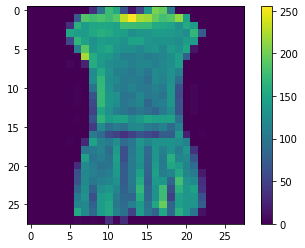

In [9]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

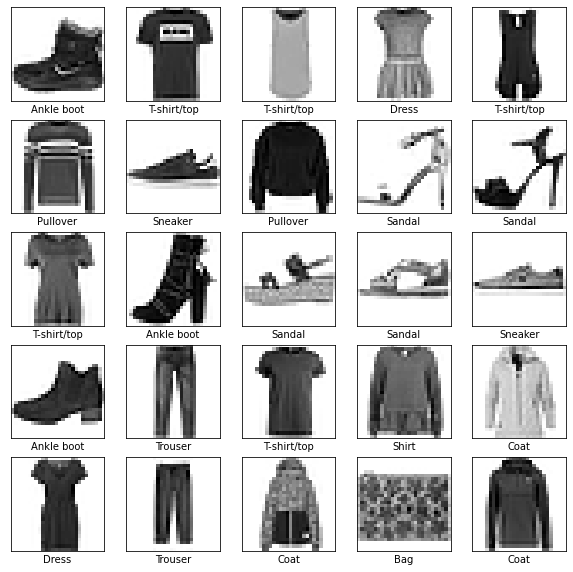

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### *Baseline* Model

In [12]:
#Model CNN biasa
inputs=Input(shape=(28,28,1))
gambar=Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1))(inputs)
gambar=MaxPooling2D(2, 2)(gambar)
gambar=Conv2D(64, (3, 3), activation='relu')(gambar)
gambar=MaxPooling2D(2, 2)(gambar)
gambar=Conv2D(128, (3, 3), activation='relu')(gambar)
gambar=MaxPooling2D(2, 2)(gambar)
gambar=Flatten()(gambar)
gambar=Dense(256, activation='relu')(gambar)
output=Dense(10, activation='softmax')(gambar)
model=Model(inputs=[inputs],outputs=[output])

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=1e-3), 
              metrics=["accuracy"])

2021-09-24 12:58:10.243733: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-24 12:58:10.246578: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-24 12:58:10.293647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-24 12:58:10.294304: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-24 12:58:10.294371: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-24 12:58:10.328207: I tensorflow/stream_executor/platform/def

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0     

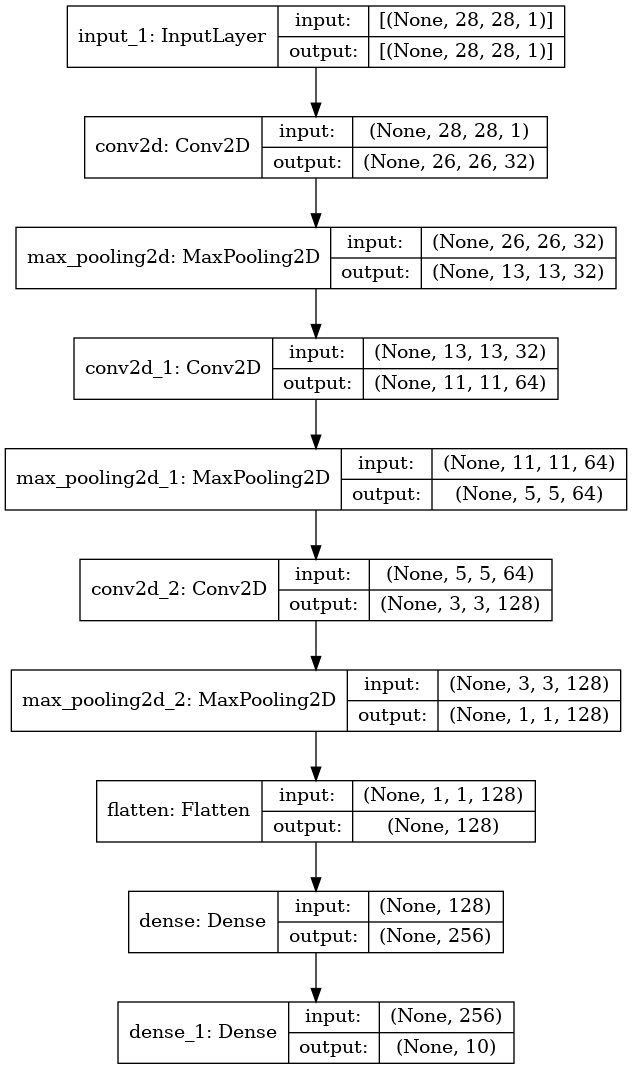

In [14]:
plot_model(model, "Model CNN Klasifikasi Citra Monokrom.png", show_shapes=True)

In [15]:
history=model.fit(train_images, train_labels, epochs=20, validation_data=(test_images,test_labels))

2021-09-24 12:58:13.748991: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-24 12:58:13.764279: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000140000 Hz


Epoch 1/20


2021-09-24 12:58:14.270286: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-24 12:58:15.120639: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-24 12:58:15.134159: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


1875/1875 [==============================] - 13s 3ms/step - loss: 0.7688 - accuracy: 0.7131 - val_loss: 0.4299 - val_accuracy: 0.8432
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4005 - accuracy: 0.8510 - val_loss: 0.3690 - val_accuracy: 0.8616
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3346 - accuracy: 0.8743 - val_loss: 0.3479 - val_accuracy: 0.8715
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2893 - accuracy: 0.8903 - val_loss: 0.3213 - val_accuracy: 0.8864
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2579 - accuracy: 0.9037 - val_loss: 0.3838 - val_accuracy: 0.8562
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2385 - accuracy: 0.9087 - val_loss: 0.3091 - val_accuracy: 0.8880
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2156 - accuracy: 0.9191 - val_loss: 0.3044 - val_accuracy: 0.8894
Ep

<Figure size 432x288 with 0 Axes>

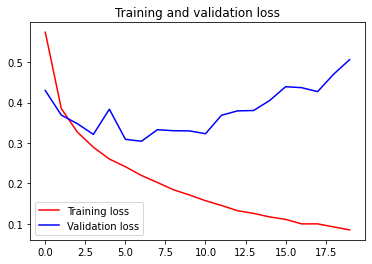

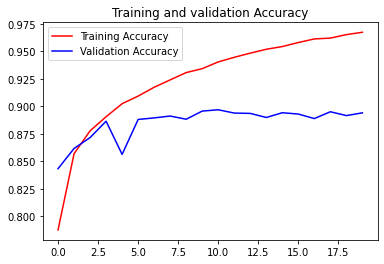

<Figure size 432x288 with 0 Axes>

In [16]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs=range(len(acc))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label ='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.figure()

In [17]:
test_eval=model.evaluate(test_images,test_labels)
for name, value in zip(model.metrics_names, test_eval):
  print(name, ': ', value)
print()

313/313 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.8940
loss :  0.5063304305076599
accuracy :  0.8939999938011169



In [18]:
Y_pred=model.predict(test_images)

In [19]:
Y_pred

array([[3.3322510e-14, 1.7275503e-13, 1.3483493e-16, ..., 3.8434680e-10,
        2.0479313e-17, 1.0000000e+00],
       [3.0946863e-11, 1.0828001e-25, 1.0000000e+00, ..., 1.3018993e-23,
        1.2125670e-11, 1.8542919e-25],
       [0.0000000e+00, 1.0000000e+00, 1.5687418e-33, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [6.3370808e-19, 9.5696660e-30, 6.8192149e-34, ..., 8.7040159e-29,
        1.0000000e+00, 2.0486981e-31],
       [8.1633652e-35, 1.0000000e+00, 2.4972811e-31, ..., 0.0000000e+00,
        1.7863633e-36, 0.0000000e+00],
       [2.9489492e-12, 2.1909200e-17, 2.6205617e-14, ..., 2.1246688e-06,
        4.1511705e-09, 1.0875164e-11]], dtype=float32)

In [20]:
Y_pred=Y_pred.argmax(axis=1)
print(classification_report(test_labels,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.82      0.86      0.84      1000
           3       0.91      0.87      0.89      1000
           4       0.86      0.80      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.68      0.74      0.71      1000
           7       0.96      0.96      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [21]:
#Simpan model
model.save("CNN Monokrom.h5")

In [22]:
#Memuat (load) model 
model=load_model("CNN Monokrom.h5")

### CNN-RF *Hybrid*

In [23]:
model_feat=Model(inputs=model.input,outputs=model.get_layer('dense').output)
feat_train=model_feat.predict(train_images)
print(feat_train.shape)

feat_test=model_feat.predict(test_images)
print(feat_test.shape)

(60000, 256)
(10000, 256)


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf=RandomForestClassifier()
rf.fit(feat_train,train_labels)

RandomForestClassifier()

In [26]:
Y_pred2=rf.predict(feat_test)

In [27]:
Y_pred2

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [28]:
print(classification_report(test_labels,Y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.86      0.84      1000
           3       0.90      0.89      0.90      1000
           4       0.83      0.84      0.84      1000
           5       0.98      0.97      0.97      1000
           6       0.71      0.70      0.71      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Berwarna

In [29]:
#Credit to https://github.com/lmoroney/dlaicourse
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-09-24 13:01:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 173.194.214.128, 74.125.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  73.2MB/s    in 0.9s    

2021-09-24 13:01:21 (73.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [30]:
import os
import zipfile

In [31]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [32]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [33]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### *Baseline*

In [34]:
#Model CNN biasa (berwarna)
inputs=Input(shape=(150,150,3))
gambar=Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3))(inputs)
gambar=MaxPooling2D(2, 2)(gambar)
gambar=Conv2D(64, (3, 3), activation='relu')(gambar)
gambar=MaxPooling2D(2, 2)(gambar)
gambar=Conv2D(128, (3, 3), activation='relu')(gambar)
gambar=MaxPooling2D(2, 2)(gambar)
gambar=Conv2D(128, (3, 3), activation='relu')(gambar)
gambar=MaxPooling2D(2, 2)(gambar)
gambar=Flatten()(gambar)
gambar=Dense(256, activation='relu')(gambar)
output=Dense(1, activation='sigmoid')(gambar)
model2=Model(inputs=[inputs],outputs=[output])

model2.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=1e-3), 
              metrics=["accuracy"])

In [35]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
history2=model2.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
200/200 [==============================] - 9s 44ms/step - loss: 0.6996 - accuracy: 0.5042 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/100
200/200 [==============================] - 9s 46ms/step - loss: 0.6937 - accuracy: 0.5172 - val_loss: 0.6793 - val_accuracy: 0.6120
Epoch 3/100
200/200 [==============================] - 9s 43ms/step - loss: 0.6810 - accuracy: 0.5849 - val_loss: 0.6366 - val_accuracy: 0.6520
Epoch 4/100
200/200 [==============================] - 9s 45ms/step - loss: 0.6256 - accuracy: 0.6511 - val_loss: 0.6766 - val_accuracy: 0.6430
Epoch 5/100
200/200 [==============================] - 9s 43ms/step - loss: 0.6207 - accuracy: 0.6571 - val_loss: 0.6448 - val_accuracy: 0.6700
Epoch 6/100
200/200 [==============================] - 9s 44ms/step - loss: 0.5613 - accuracy: 0.7022 - val_loss: 0.6026 - val_accuracy: 0.6770
Epoch 7/100
200/200 [==============================] - 9s 43ms/step - loss: 0.5147 - accuracy: 0.7408 - val_loss: 0.6144 - val_accuracy:

<Figure size 432x288 with 0 Axes>

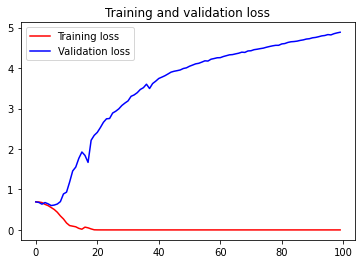

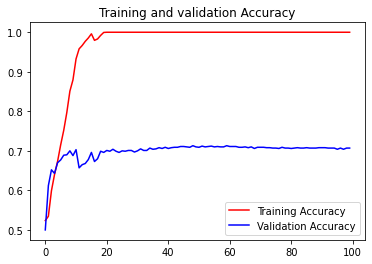

<Figure size 432x288 with 0 Axes>

In [38]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

loss=history2.history['loss']
val_loss=history2.history['val_loss']
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']

epochs=range(len(acc))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label ='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.figure()

In [39]:
test_eval2=model2.evaluate(validation_generator)
for name, value in zip(model2.metrics_names, test_eval2):
  print(name, ': ', value)
print()

100/100 [==============================] - 3s 27ms/step - loss: 4.8863 - accuracy: 0.7070
loss :  4.88627290725708
accuracy :  0.7070000171661377



In [40]:
#Simpan model
model2.save("CNN Berwarna.h5")

In [41]:
#Memuat (load) model 
model2=load_model("CNN Berwarna.h5")

### Transfer Learning

In [42]:
from tensorflow.keras.applications import InceptionV3

In [43]:
incept_model=InceptionV3(input_shape=(150,150,3),include_top=False)
incept_model.trainable=False

87916544/87910968 [==============================] - 1s 0us/step


In [44]:
incept_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_7[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [45]:
last_output=incept_model.get_layer('mixed10').output
print('last layer output shape: ', incept_model.output_shape)

last layer output shape:  (None, 3, 3, 2048)


In [46]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.1)(x)                  
x = layers.Dense(1, activation='sigmoid')(x)           

model3 = Model(incept_model.input, x) 
model3.summary

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7fdd31bc67d0>>

In [47]:
model3.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=1e-3), 
              metrics=["accuracy"])

In [48]:
history3=model3.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
200/200 [==============================] - 15s 56ms/step - loss: 4.9422 - accuracy: 0.8733 - val_loss: 0.5368 - val_accuracy: 0.9540
Epoch 2/100
200/200 [==============================] - 11s 54ms/step - loss: 0.3267 - accuracy: 0.9589 - val_loss: 0.6285 - val_accuracy: 0.9260
Epoch 3/100
200/200 [==============================] - 13s 64ms/step - loss: 0.1431 - accuracy: 0.9724 - val_loss: 0.2384 - val_accuracy: 0.9570
Epoch 4/100
200/200 [==============================] - 10s 52ms/step - loss: 0.0469 - accuracy: 0.9882 - val_loss: 0.2065 - val_accuracy: 0.9640
Epoch 5/100
200/200 [==============================] - 10s 52ms/step - loss: 0.0337 - accuracy: 0.9888 - val_loss: 0.2453 - val_accuracy: 0.9610
Epoch 6/100
200/200 [==============================] - 10s 51ms/step - loss: 0.0300 - accuracy: 0.9910 - val_loss: 0.1882 - val_accuracy: 0.9610
Epoch 7/100
200/200 [==============================] - 13s 67ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2052 - val_ac

<Figure size 432x288 with 0 Axes>

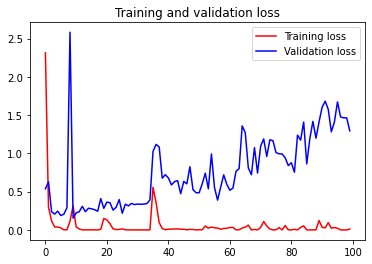

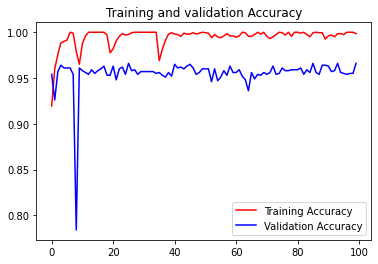

<Figure size 432x288 with 0 Axes>

In [49]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

loss=history3.history['loss']
val_loss=history3.history['val_loss']
acc=history3.history['accuracy']
val_acc=history3.history['val_accuracy']

epochs=range(len(acc))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label ='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.figure()

In [50]:
test_eval3=model3.evaluate(validation_generator)
for name, value in zip(model3.metrics_names, test_eval3):
  print(name, ': ', value)
print()

100/100 [==============================] - 3s 33ms/step - loss: 1.2939 - accuracy: 0.9660
loss :  1.2939316034317017
accuracy :  0.9660000205039978



In [51]:
#Simpan model
model3.save("CNN Transfer Learning.h5")

In [52]:
#Memuat (load) model 
model3=load_model("CNN Transfer Learning.h5")